In [19]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

In [6]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [7]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [8]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
model = StandardScaler()
normalized_data = model.fit_transform(df_market_data)
df_normalized = pd.DataFrame(normalized_data, columns=df_market_data.columns, index=df_market_data.index)
df_normalized.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [13]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_normalized.values, columns=df_normalized.columns)
# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index
# Set the coinid column as index
df_scaled.set_index('coin_id', inplace=True)
# Display sample data
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [16]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [17]:
# Create an empty list to store the inertia values

inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    inertia_values.append(model.inertia_)


In [18]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k_values, "inertia": inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

df_elbow

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,64.127997
5,6,53.057788
6,7,45.018884
7,8,36.851477
8,9,32.485241
9,10,28.035594


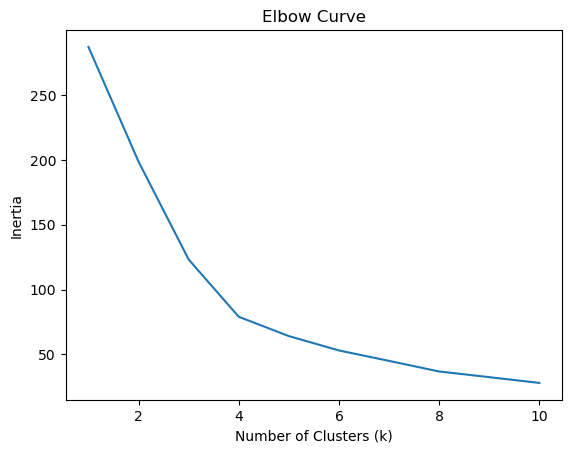

In [20]:
# Plot a line chart with all the inertia values computed with 
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
K4 is where the elbow starts to plateau


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [21]:
# Initialize the K-Means model using the best value for k
kmeans_4 = KMeans(n_clusters=4)

In [22]:
# Fit the K-Means model using the scaled data
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data

cluster_labels = kmeans.predict(df_scaled)
# Print the resulting array of cluster values.
print(cluster_labels)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [24]:
# Create a copy of the DataFrame
df_copy = df_normalized.copy()

In [25]:
# Add a new column to the DataFrame with the predicted clusters
df_normalized['cluster'] = model.labels_


# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


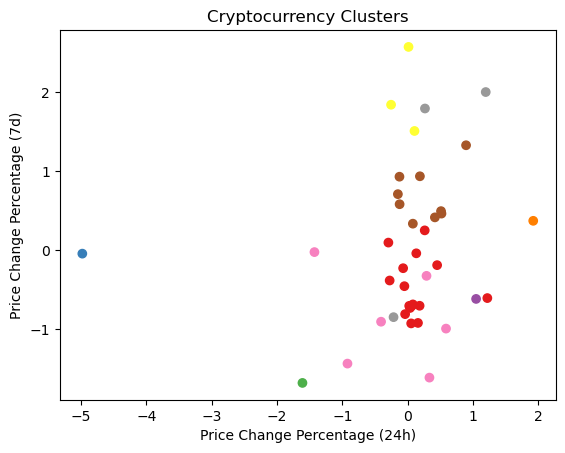

In [26]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.scatter(df_normalized["price_change_percentage_24h"], df_normalized["price_change_percentage_7d"], c=df_normalized["cluster"], cmap="Set1")

# Add labels and title
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.title("Cryptocurrency Clusters")

# Show the plot
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [28]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca = PCA(n_components=3)
# View the first five rows of the DataFrame. 

pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
df_pca.head(5)

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [29]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
 89.49%.

the sum of the explained variances for each : 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166.

Hence, the total explained variance of the three principal components is approximately 0.895 or 89.49%. This suggests that these components effectively capture a substantial portion of the variability present in the initial dataset

In [30]:
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
# Copy the crypto names from the original data

df_pca['coin_id'] = df_market_data.index

# Set the coinid column as index

df_pca.set_index('coin_id', inplace=True)
# Display sample data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [31]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [32]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
inertia_values = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertia_values.append(model.inertia_)

In [33]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": range(1, 11), "inertia": inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.145312
7,8,17.091637
8,9,13.731589
9,10,10.484890


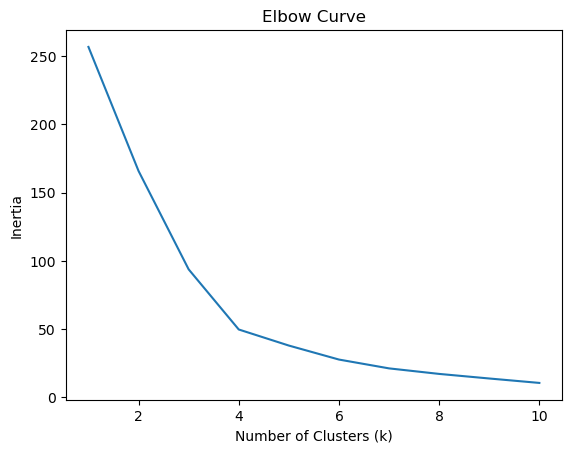

In [34]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
based on the provided Elbow curve the best value for k would be around 4, where the curve starts to flatten out

* **Question:** Does it differ from the best k value found using the original data?
                    
  * **Answer:**  
it dose not differ both charts show where both charts show the data start to plateau 

  
  

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [35]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)

In [36]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [37]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_pca)
# Print the resulting array of cluster values.
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [38]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['cluster'] = clusters


# Display sample data
df_pca_copy.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


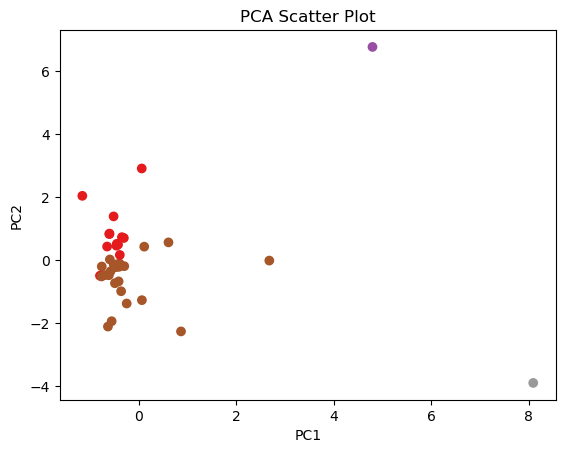

In [39]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plt.scatter(df_pca_copy['PC1'], df_pca_copy['PC2'], c=df_pca_copy['cluster'], cmap='Set1')
plt.title("PCA Scatter Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

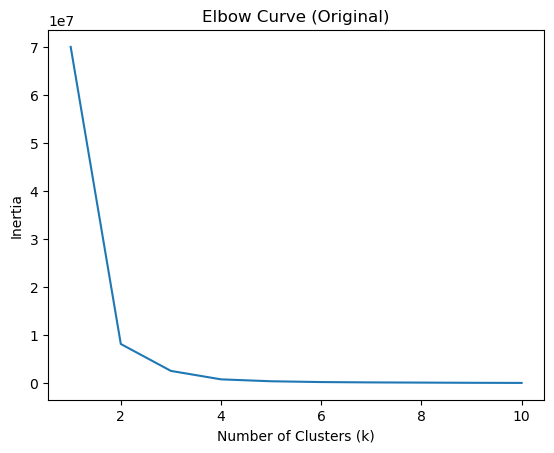

In [40]:
# Composite plot to contrast the Elbow curves

# Create an empty list to store the inertia values
inertia_values_original = []

# Compute the inertia with each possible value of k
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit(df_market_data)
    inertia_values_original.append(model.inertia_)

# Original Elbow curve data
elbow_data_original = {"k": range(1, 11), "inertia": inertia_values_original}

# Create the DataFrame with the original elbow curve data
df_elbow = pd.DataFrame(elbow_data_original)

# Original Elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve (Original)')
plt.show()

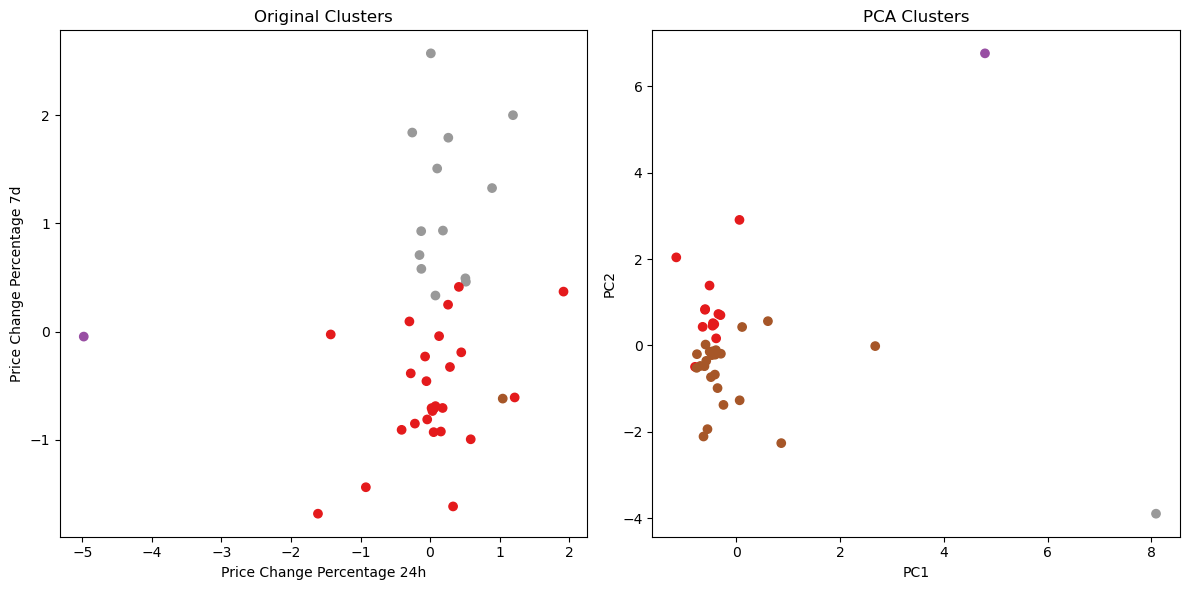

In [41]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original scatter plot
ax1.scatter(df_normalized['price_change_percentage_24h'], df_normalized['price_change_percentage_7d'], c=cluster_labels, cmap='Set1')
ax1.set_xlabel('Price Change Percentage 24h')
ax1.set_ylabel('Price Change Percentage 7d')
ax1.set_title('Original Clusters')

# Plot the PCA scatter plot
ax2.scatter(df_pca['PC1'], df_pca['PC2'], c=clusters, cmap='Set1')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Clusters')

# Adjust spacing between subplots
fig.tight_layout()

# Display the composite plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  Reduced dimensionality: Employing a reduced number of features leads to a decrease in the data's dimensionality. This simplification aids in streamlining the clustering process by honing in on the most pertinent data aspects while filtering out noise or extraneous information.

Loss of information: Opting for fewer features may result in the loss of potentially valuable information pertinent to clustering. If the omitted features harbor relevant patterns or significantly contribute to the overall data structure, their exclusion may yield less precise or distinguishable clusters.

Increased interpretability: With a diminished feature set, resulting clusters become more readily interpretable and comprehensible. Visualizing and interpreting clusters in high-dimensional spaces pose challenges, but reducing dimensionality facilitates analysis and explication of clustering outcomes.

Improved scalability: Clustering algorithms, such as K-Means, can strain computational resources when handling high-dimensional data. By reducing feature count, scalability potentially enhances, enabling more efficient processing of larger datasets.

Greater sensitivity to feature selection: The selection of features gains heightened importance when utilizing fewer of them. Chosen features must exhibit robust discriminatory power and capture essential data characteristics. Poor feature selection can detrimentally affect clustering outcomes.

In summary, employing a reduced feature set for K-Means clustering presents both advantages and drawbacks. It offers simplification, interpretability, and scalability benefits but risks information loss and heightened sensitivity to feature selection. The outcome's impact hinges on the specific dataset, chosen features, and clustering objectives.